# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

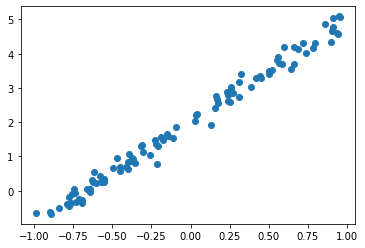

In [88]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [89]:
#Analytical model
xm = np.mean(xd)
ym = np.mean(yd)
syy = np.mean((yd-ym)**2)
syx = np.mean((yd-ym)*(xd-xm))
sxx = np.mean((xd-xm)**2)

beta1 = syx/sxx # linear term
beta0 = ym - beta1*xm# constant term
analyticalModel = np.array([beta0,beta1])

### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same. 

**Analytical Model Result**

In [90]:
#evaluate your model

# new data
xplot = np.random.uniform(-1,1,nsamp)# generate uniform points between -1 and 1

# prediction
ypredict = poly.polyval(xplot,analyticalModel)# get prediction on data xplot


**Polyfit Model Prediction**

In [91]:
polyfitModel = np.polyfit(xd, yd, 1)#use the polyfit function
yfit = np.polyval(polyfitModel, xplot)# use the polyval function to evaluate polyfitModel at x = xplot 

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

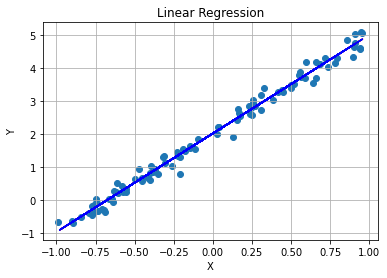

In [92]:
#plot your results
fig, ax = plt.subplots()
ax.scatter(xd, yd)

# Plot polyfit model and analytical model result:
# Your Code
plt.plot(xplot, ypredict, 'r')
plt.plot(xplot, yfit, 'b')
ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test. 

In [93]:
from sklearn.model_selection import train_test_split

import pandas as pd
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

train, test = train_test_split(df, test_size = 0.3)# Use function or your own code to split df

In [94]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [95]:
def linear_regression(xd, yd):
  xm = np.mean(xd)
  ym = np.mean(yd)
  syy = np.mean((yd-ym)**2)
  syx = np.mean((yd-ym)*(xd-xm))
  sxx = np.mean((xd-xm)**2)

  beta1 = syx/sxx # linear term
  beta0 = ym - beta1*xm# constant term
  Model = np.array([beta0,beta1])
  return Model


sales_TV_beta     = linear_regression(train['TV'], train['sales'])# Use function or your own code to do linear regression
sales_newspaper_beta  = linear_regression(train['newspaper'], train['sales'])# 
sales_radio_beta    = linear_regression(train['radio'], train['sales'])#

### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

Text(0.5, 1.0, 'radio')

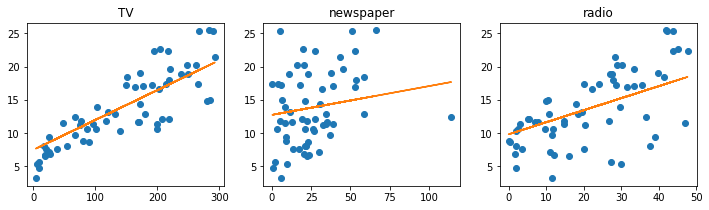

In [96]:
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
'''
  Your code
'''
xtv = test['TV']
ytv = test['sales']
yptv = poly.polyval(xtv,sales_TV_beta)
plt.plot(xtv, ytv, 'o')
plt.plot(xtv, yptv)
plt.title("TV")
## Sales to newspaper spend
plt.subplot(1,3,2)
'''
  Your code
'''
xne = test['newspaper']
yne = test['sales']
ypne = poly.polyval(xne,sales_newspaper_beta)
plt.plot(xne, yne, 'o')
plt.plot(xne, ypne)
plt.title("newspaper")
## Sales to radio spend
plt.subplot(1,3,3)
'''
  Your code
'''
xra = test['radio']
yra = test['sales']
ypra = poly.polyval(xra,sales_radio_beta)
plt.plot(xra, yra, 'o')
plt.plot(xra, ypra)
plt.title("radio")

## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [97]:

# Define training X matrix
X = np.vstack((np.ones(train['newspaper'].size), train['newspaper'], train['radio'], train['TV']))
trainX = X.transpose()

# Define training Y matrix
trainY = train['sales']

# Get your Model(Using the closed form in class)
XT = np.transpose(trainX)
XTX = np.transpose(trainX).dot(trainX)
inev = np.linalg.inv(XTX).dot(XT)
multivariate_beta = inev.dot(trainY)# beta = (XTX)^-1XTY

### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [98]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predcit result using your model multivariate_beta
pred = testX.dot(multivariate_beta)

### Plot Result

**Q9**: Plot your predictions against real labels.

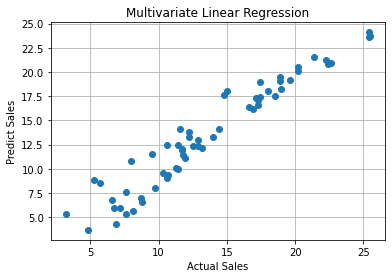

In [99]:
fig, ax = plt.subplots()

# Your Code
plt.plot(testY, pred, 'o')
ax.set(xlabel='Actual Sales', ylabel='Predict Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()